In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

from haversine import haversine
from scipy.spatial.distance import euclidean , cityblock
from geopy.distance import great_circle
from math import *

from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

import folium 
from folium import plugins
from folium.plugins import HeatMap
import baseline 

output_notebook()

Loading BokehJS ...

In [2]:
sf = pd.read_csv("resp_data.csv")
sf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [3]:
# To calculate total spending per customer
sf['TotalSpending'] = sf[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                          'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [4]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,251
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,11
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,91


In [5]:
# Count the number of purchases per customer
sf['NumPurchases'] = sf[['NumDealsPurchases', 'NumWebPurchases', 
                         'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)


In [6]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,218,1,4,4,6,1,1,0,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,37,1,7,3,7,5,1,0,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,30,1,3,2,5,2,0,0,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,1,1,0,2,7,0,0,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,34,2,3,1,2,7,1,0,91,8


In [7]:
# Calculate average purchase value (APV)
sf['APV'] = round(sf['TotalSpending'] / sf['NumPurchases'],2)

In [8]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,APV
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,1,4,4,6,1,1,0,1190,15,79.33
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,1,7,3,7,5,1,0,577,18,32.06
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,1,3,2,5,2,0,0,251,11,22.82
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,1,0,2,7,0,0,11,4,2.75
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,2,3,1,2,7,1,0,91,8,11.38


In [9]:
# Subtracting the date in the 'Dt_Customer' column from December 31, 2014 
#(the last date for the year 2014, the customers were tracked between 2012 – 2014 – approx. 2yrs).
sf["days_since_customer"] = (pd.to_datetime('12/31/2014') - pd.to_datetime(sf['Dt_Customer'])).dt.days

In [10]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,APV,days_since_customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,4,4,6,1,1,0,1190,15,79.33,198
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,3,7,5,1,0,577,18,32.06,199
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,3,2,5,2,0,0,251,11,22.82,232
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,0,2,7,0,0,11,4,2.75,56
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,1,2,7,1,0,91,8,11.38,149


In [11]:
# Calculate average purchase frequency (APF)
sf['APF'] = sf['NumPurchases'] / sf["days_since_customer"]

In [12]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,APV,days_since_customer,APF
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,4,6,1,1,0,1190,15,79.33,198,0.075758
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,3,7,5,1,0,577,18,32.06,199,0.090452
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,5,2,0,0,251,11,22.82,232,0.047414
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,2,7,0,0,11,4,2.75,56,0.071429
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,1,2,7,1,0,91,8,11.38,149,0.053691


In [13]:
#To Calculate Customer Value (CV)
sf['CV'] = sf['APV'] * sf['APF']

In [14]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,APV,days_since_customer,APF,CV
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,1,0,1190,15,79.33,198,0.075758,6.009848
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,1,0,577,18,32.06,199,0.090452,2.899899
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,251,11,22.82,232,0.047414,1.081983
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,2,7,0,0,11,4,2.75,56,0.071429,0.196429
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,2,7,1,0,91,8,11.38,149,0.053691,0.611007


In [15]:
# Display the results
print(sf[['Id', 'CV']])

         Id        CV
0      1826  6.009848
1         1  2.899899
2     10476  1.081983
3      1386  0.196429
4      5371  0.611007
...     ...       ...
2235  10142  1.261905
2236   5263  0.077684
2237     22  0.301738
2238    528  1.814961
2239   4070  0.991739

[2240 rows x 2 columns]


In [16]:
sf.shape

(2240, 28)

In [17]:
sf.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
TotalSpending            int64
NumPurchases             int64
APV                    float64
days_since_customer      int64
APF                    float64
CV                     float64
dtype: object

In [18]:
sf["Dt_Customer"] = pd.to_datetime(sf["Dt_Customer"], infer_datetime_format=True)

/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1334/2161344139.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sf["Dt_Customer"] = pd.to_datetime(sf["Dt_Customer"], infer_datetime_format=True)


In [19]:
sf.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
TotalSpending                   int64
NumPurchases                    int64
APV                           float64
days_since_customer             int64
APF         

In [20]:
# To generate the days,month,year columns
sf["Day_Week"] = sf["Dt_Customer"].dt.dayofweek
sf["Day_Week_Name"] = sf["Dt_Customer"].dt.day_name()
sf["Month"] = sf["Dt_Customer"].dt.month
sf["Year"] = sf["Dt_Customer"].dt.year

In [21]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,TotalSpending,NumPurchases,APV,days_since_customer,APF,CV,Day_Week,Day_Week_Name,Month,Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1190,15,79.33,198,0.075758,6.009848,0,Monday,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,577,18,32.06,199,0.090452,2.899899,6,Sunday,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,251,11,22.82,232,0.047414,1.081983,1,Tuesday,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,11,4,2.75,56,0.071429,0.196429,2,Wednesday,11,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,91,8,11.38,149,0.053691,0.611007,0,Monday,8,2014


In [22]:
#To Categorize Customer start date to weekdays and weekends
sf.loc[sf["Day_Week"]<= 5, "Dt_Customer_Period"] = "Weekdays"
sf.loc[sf["Day_Week"]>5, "Dt_Customer_Period"] = "Weekends"

/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1334/2241513129.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Weekdays' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sf.loc[sf["Day_Week"]<= 5, "Dt_Customer_Period"] = "Weekdays"


In [23]:
sf.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumPurchases,APV,days_since_customer,APF,CV,Day_Week,Day_Week_Name,Month,Year,Dt_Customer_Period
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,15,79.33,198,0.075758,6.009848,0,Monday,6,2014,Weekdays
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,18,32.06,199,0.090452,2.899899,6,Sunday,6,2014,Weekends
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,11,22.82,232,0.047414,1.081983,1,Tuesday,5,2014,Weekdays
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,4,2.75,56,0.071429,0.196429,2,Wednesday,11,2014,Weekdays
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,8,11.38,149,0.053691,0.611007,0,Monday,8,2014,Weekdays


In [24]:
sf.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
TotalSpending                   int64
NumPurchases                    int64
APV                           float64
days_since_customer             int64
APF         

In [25]:
sf.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
TotalSpending           0
NumPurchases            0
APV                     0
days_since_customer     0
APF                     0
CV                      4
Day_Week                0
Day_Week_Name           0
Month                   0
Year                    0
Dt_Customer_Period      0
dtype: int64

In [26]:
sf["Income"].mean()

52247.25135379061

In [27]:
sf["Income"].fillna(52247.3,inplace=True )

In [28]:
sf["CV"].mean()

1.596099434475194

In [29]:
sf["CV"].fillna(1.596099, inplace=True)

In [30]:
sf.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
TotalSpending          0
NumPurchases           0
APV                    0
days_since_customer    0
APF                    0
CV                     0
Day_Week               0
Day_Week_Name          0
Month                  0
Year                   0
Dt_Customer_Period     0
dtype: int64

In [31]:
sf.duplicated().sum()

0

In [32]:
sf.shape

(2240, 33)

### Data Exploration and Data Visualisation

### 1. How does the total spending vary across different customer segments or demographics?

In [33]:
ts_ed = sf.groupby("Education")["TotalSpending"].sum().to_frame().reset_index()
ts_ed

,Education,TotalSpending
0,2n Cycle,100795
1,Basic,4417
2,Graduation,698626
3,Master,226359
4,PhD,326791


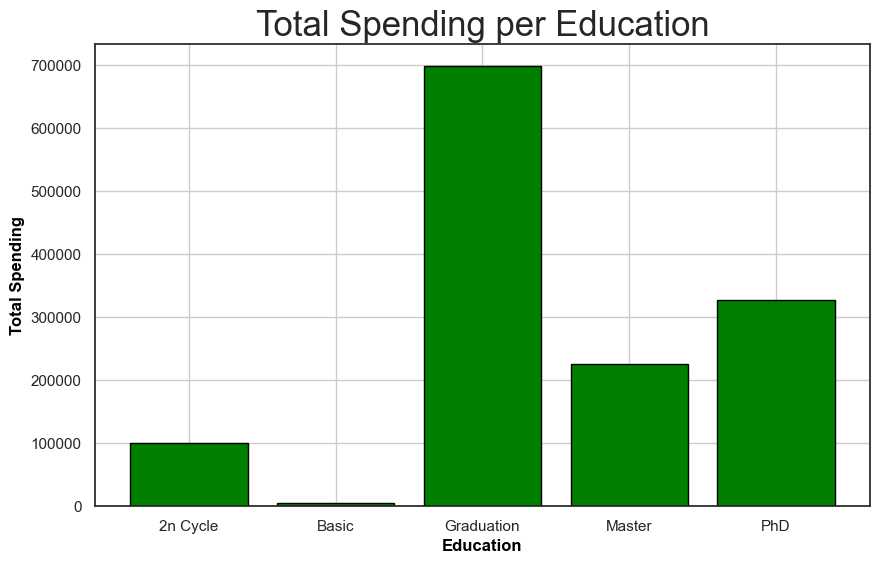

In [34]:
x = ts_ed["Education"]
y = ts_ed["TotalSpending"]

plt.figure(figsize=(10, 6))
plt.bar(x,y, color="green", edgecolor = "black")
plt.title("Total Spending per Education", fontsize=25)
plt.xlabel("Education", fontsize=12, fontweight="bold", color = "black")
plt.ylabel("Total Spending", fontsize=12, fontweight="bold", color = "black")
plt.grid()

In [35]:
ts_ms = sf.groupby("Marital_Status")["TotalSpending"].sum().to_frame().reset_index()
ts_ms

,Marital_Status,TotalSpending
0,Absurd,2385
1,Alone,770
2,Divorced,141666
3,Married,510453
4,Single,291112
5,Together,352865
6,Widow,56889
7,YOLO,848


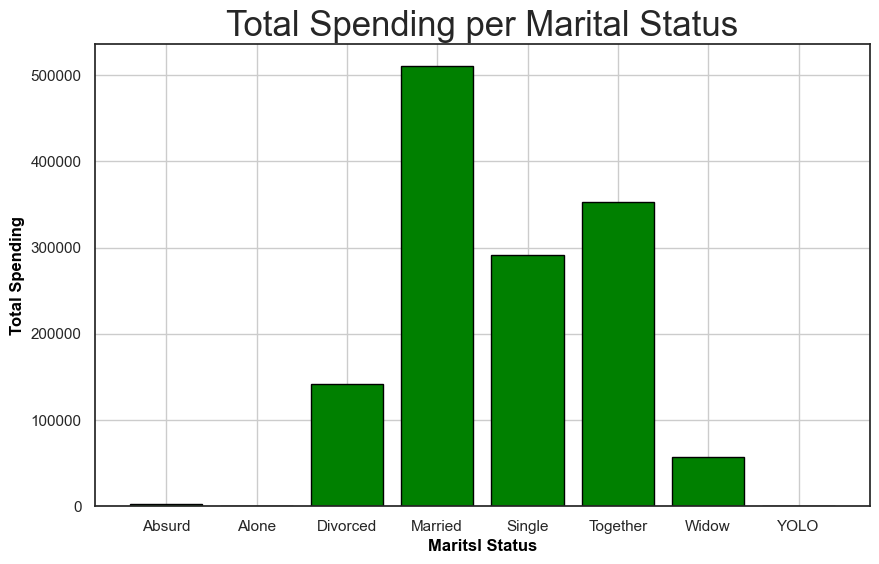

In [36]:
x = ts_ms["Marital_Status"]
y = ts_ms["TotalSpending"]

plt.figure(figsize=(10, 6))
plt.bar(x,y, color="green", edgecolor = "black")
plt.title("Total Spending per Marital Status", fontsize=25)
plt.xlabel("Maritsl Status", fontsize=12, fontweight="bold", color = "black")
plt.ylabel("Total Spending", fontsize=12, fontweight="bold", color = "black")
plt.grid()

In [37]:
from datetime import datetime

In [38]:
yr = datetime.now().year

In [39]:
sf["Age"] = yr - sf["Year_Birth"]

In [40]:
sf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,APV,days_since_customer,APF,CV,Day_Week,Day_Week_Name,Month,Year,Dt_Customer_Period,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,79.33,198,0.075758,6.009848,0,Monday,6,2014,Weekdays,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,32.06,199,0.090452,2.899899,6,Sunday,6,2014,Weekends,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,22.82,232,0.047414,1.081983,1,Tuesday,5,2014,Weekdays,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,2.75,56,0.071429,0.196429,2,Wednesday,11,2014,Weekdays,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,11.38,149,0.053691,0.611007,0,Monday,8,2014,Weekdays,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,34.45,546,0.036630,1.261905,2,Wednesday,7,2013,Weekdays,48
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,11.00,708,0.007062,0.077684,1,Tuesday,1,2013,Weekdays,47
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,22.07,1024,0.013672,0.301738,0,Monday,3,2012,Weekdays,48
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,69.15,762,0.026247,1.814961,3,Thursday,11,2012,Weekdays,46


In [41]:
def age_cat(col):
    if col["Age"] >= 60:
        return "Elderly"
    elif col["Age"] >=35:
        return "Young Adult"
    elif col["Age"] >=25:
        return "Youth"
    elif col["Age"] >=19:
        return "Teens"
    else:
        return "Child"
    

In [42]:
sf["Age_Category"] = sf.apply(age_cat,axis=1)

In [43]:
ts_age_cat = sf.groupby("Age_Category")["TotalSpending"].sum().to_frame().reset_index()
ts_age_cat

,Age_Category,TotalSpending
0,Elderly,558192
1,Young Adult,749351
2,Youth,49445


In [44]:
y = ts_age_cat["Age_Category"]
x = ts_age_cat["TotalSpending"]

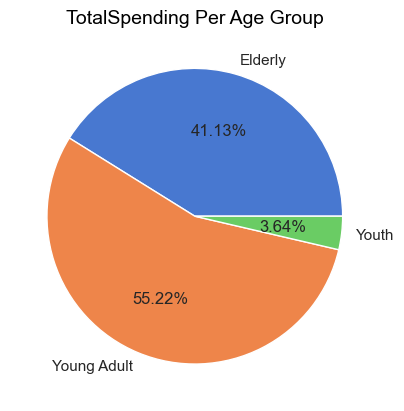

In [45]:
plt.pie(x, labels=y, autopct= "%1.2f%%")
plt.title("TotalSpending Per Age Group", fontsize=14, color="black")
plt.show()

### 2. Which channels (web, catalog, store) contribute the most to the total number of purchases?

In [46]:
sf.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TotalSpending', 'NumPurchases', 'APV',
       'days_since_customer', 'APF', 'CV', 'Day_Week', 'Day_Week_Name',
       'Month', 'Year', 'Dt_Customer_Period', 'Age', 'Age_Category'],
      dtype='object')

In [47]:
total_channel = sf[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]


In [48]:
total_web_cat_str = total_channel.sum()

In [49]:
total_web_cat_str

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

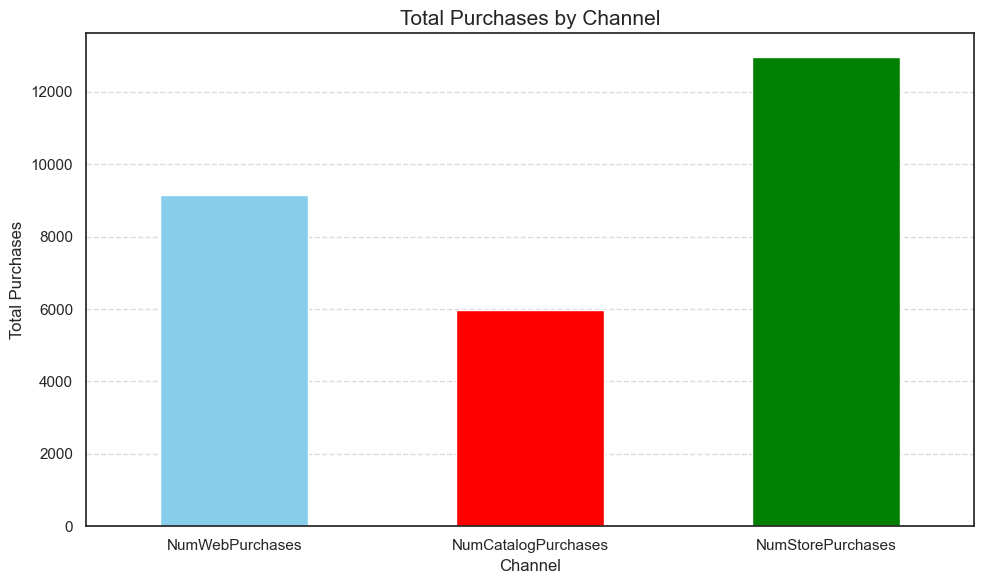

In [56]:
plt.figure(figsize=(10, 6))
total_web_cat_str.plot(kind='bar', color=['skyblue', 'red', 'green'])
plt.title('Total Purchases by Channel', fontsize=15)
plt.xlabel('Channel')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Do certain product categories have higher or lower average purchase values?

In [52]:
product_cat = sf[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [53]:
average_purchase_values = product_cat.mean()


In [54]:
average_purchase_values

MntWines            303.935714
MntFruits            26.302232
MntMeatProducts     166.950000
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntGoldProds         44.021875
dtype: float64

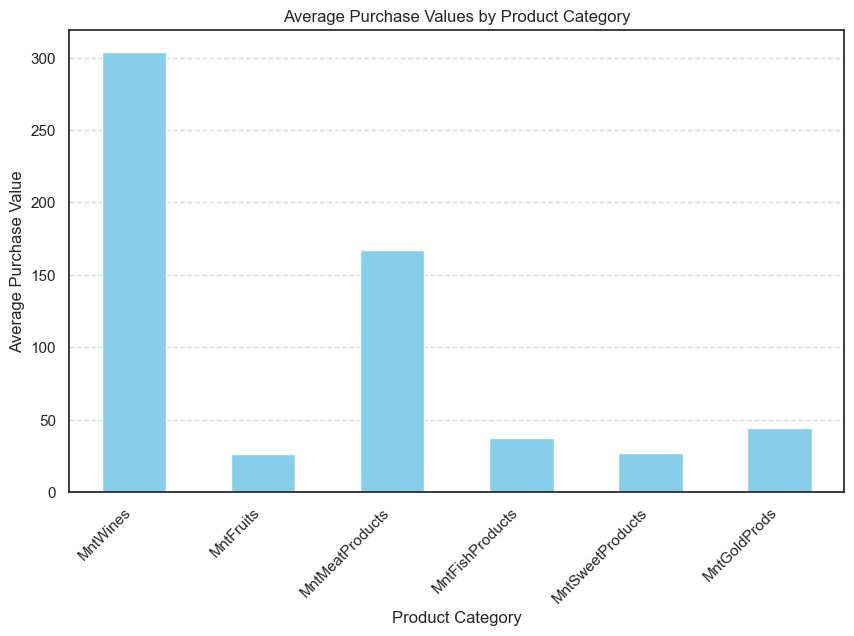

In [55]:
plt.figure(figsize=(10, 6))
average_purchase_values.plot(kind='bar', color='skyblue')
plt.title('Average Purchase Values by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

### 4. How does average purchase value correlate with customer response to campaign?

In [57]:
sf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,days_since_customer,APF,CV,Day_Week,Day_Week_Name,Month,Year,Dt_Customer_Period,Age,Age_Category
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,198,0.075758,6.009848,0,Monday,6,2014,Weekdays,54,Young Adult
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,199,0.090452,2.899899,6,Sunday,6,2014,Weekends,63,Elderly
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,232,0.047414,1.081983,1,Tuesday,5,2014,Weekdays,66,Elderly
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,56,0.071429,0.196429,2,Wednesday,11,2014,Weekdays,57,Young Adult
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,149,0.053691,0.611007,0,Monday,8,2014,Weekdays,35,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,546,0.036630,1.261905,2,Wednesday,7,2013,Weekdays,48,Young Adult
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,708,0.007062,0.077684,1,Tuesday,1,2013,Weekdays,47,Young Adult
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1024,0.013672,0.301738,0,Monday,3,2012,Weekdays,48,Young Adult
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,762,0.026247,1.814961,3,Thursday,11,2012,Weekdays,46,Young Adult


In [74]:
response_count = sf["Response"].value_counts()
response_count

Response
0    1906
1     334
Name: count, dtype: int64

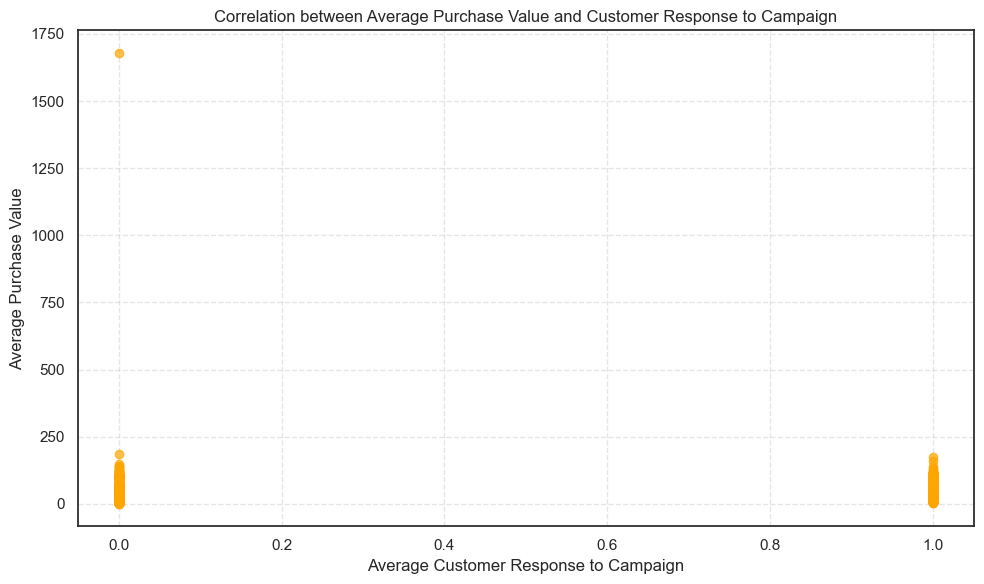

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(sf["Response"],sf["APV"], color='orange', alpha=0.7)
plt.title('Correlation between Average Purchase Value and Customer Response to Campaign')
plt.xlabel('Average Customer Response to Campaign')
plt.ylabel('Average Purchase Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 5. Are there specific days of the week, month, weekend/weekday, seasons and holiday indicatorwhen purchase frequency increases or decreases?

In [78]:
# Group by day of the week
purchase_by_day_of_week = sf.groupby('Day_Week_Name').size()

In [80]:
purchase_by_day_of_week

Day_Week_Name
Friday       313
Monday       313
Saturday     304
Sunday       344
Thursday     317
Tuesday      315
Wednesday    334
dtype: int64

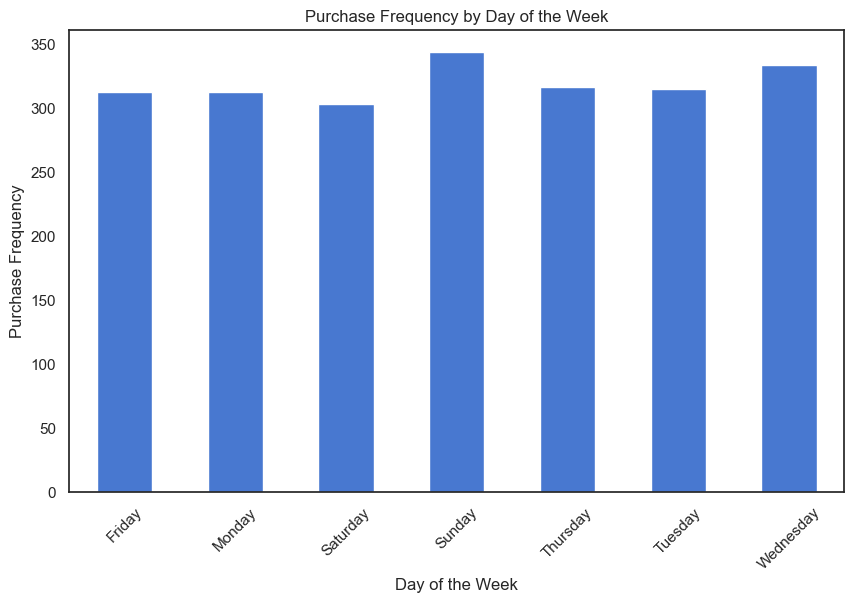

In [79]:
plt.figure(figsize=(10, 6))
purchase_by_day_of_week.plot(kind='bar')
plt.title('Purchase Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

In [82]:
# Group by month
purchase_by_month = sf.groupby('Month').size()

In [83]:
purchase_by_month

Month
1     191
2     187
3     202
4     184
5     192
6     170
7     141
8     211
9     166
10    209
11    185
12    202
dtype: int64

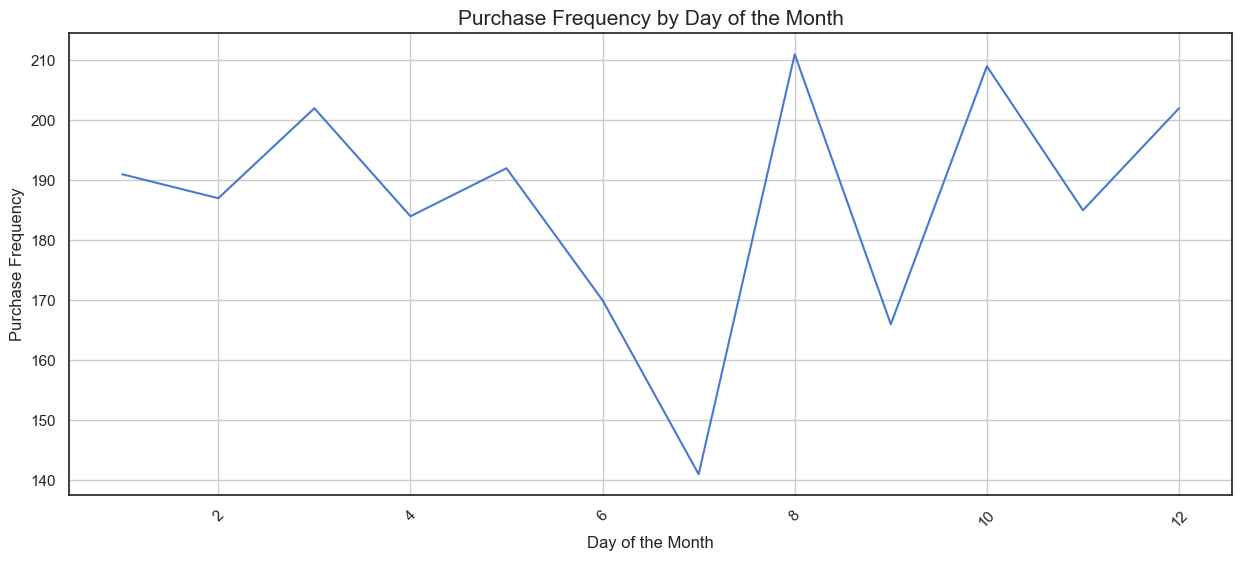

In [86]:
plt.figure(figsize=(15, 6))
purchase_by_month.plot(kind='line')
plt.title('Purchase Frequency by Day of the Month', fontsize=15)
plt.xlabel('Day of the Month')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [87]:
# Group by year (for seasonal analysis)
purchase_by_year = sf.groupby('Year').size()

In [88]:
purchase_by_year

Year
2012     494
2013    1189
2014     557
dtype: int64

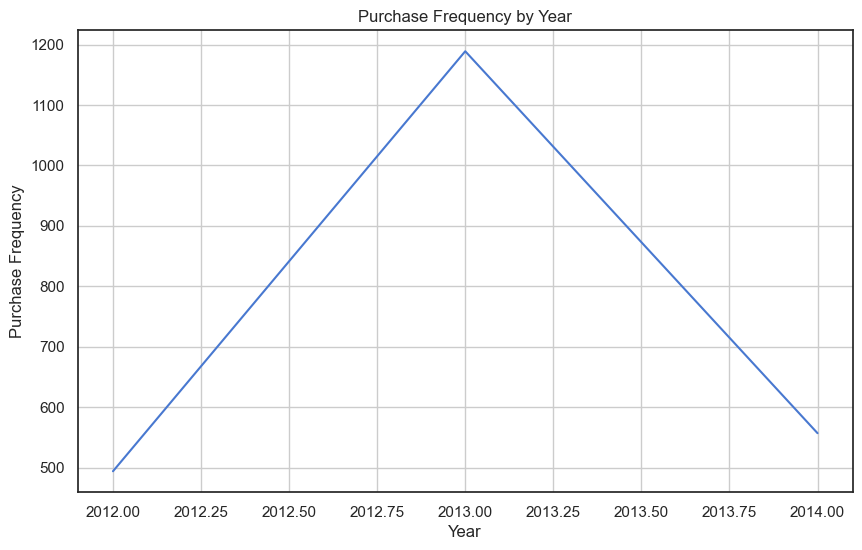

In [90]:
plt.figure(figsize=(10, 6))
purchase_by_year.plot(kind='line')
plt.title('Purchase Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.show()

In [91]:
sf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,days_since_customer,APF,CV,Day_Week,Day_Week_Name,Month,Year,Dt_Customer_Period,Age,Age_Category
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,198,0.075758,6.009848,0,Monday,6,2014,Weekdays,54,Young Adult
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,199,0.090452,2.899899,6,Sunday,6,2014,Weekends,63,Elderly
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,232,0.047414,1.081983,1,Tuesday,5,2014,Weekdays,66,Elderly
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,56,0.071429,0.196429,2,Wednesday,11,2014,Weekdays,57,Young Adult
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,149,0.053691,0.611007,0,Monday,8,2014,Weekdays,35,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,546,0.036630,1.261905,2,Wednesday,7,2013,Weekdays,48,Young Adult
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,708,0.007062,0.077684,1,Tuesday,1,2013,Weekdays,47,Young Adult
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1024,0.013672,0.301738,0,Monday,3,2012,Weekdays,48,Young Adult
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,762,0.026247,1.814961,3,Thursday,11,2012,Weekdays,46,Young Adult


In [92]:
# Group by day of the week
purchase_by_period= sf.groupby('Dt_Customer_Period').size()

In [93]:
purchase_by_period

Dt_Customer_Period
Weekdays    1896
Weekends     344
dtype: int64

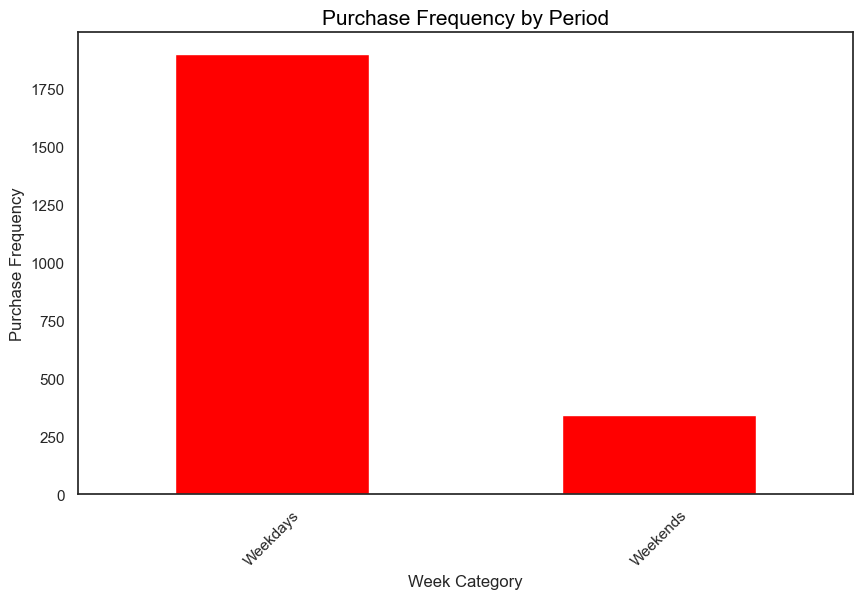

In [97]:
plt.figure(figsize=(10, 6))
purchase_by_period.plot(kind='bar', color="red")
plt.title('Purchase Frequency by Period', fontsize=15, color="black")
plt.xlabel('Week Category')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

### 6. Does purchase frequency vary based on customer demographics?

In [101]:
purchase_by_education = sf.groupby('Education').size() 
purchase_by_marital_status = sf.groupby('Marital_Status').size()  

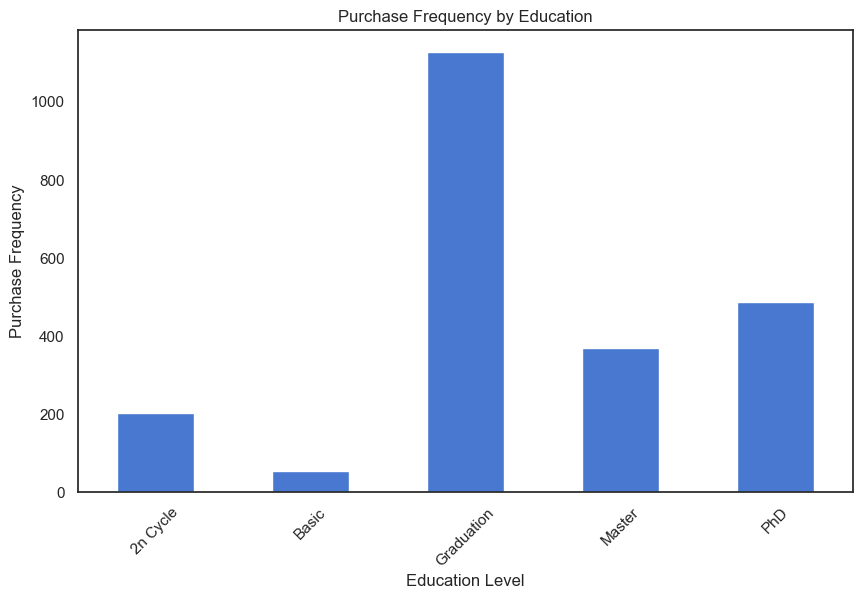

In [102]:
plt.figure(figsize=(10, 6))
purchase_by_education.plot(kind='bar')
plt.title('Purchase Frequency by Education')
plt.xlabel('Education Level')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

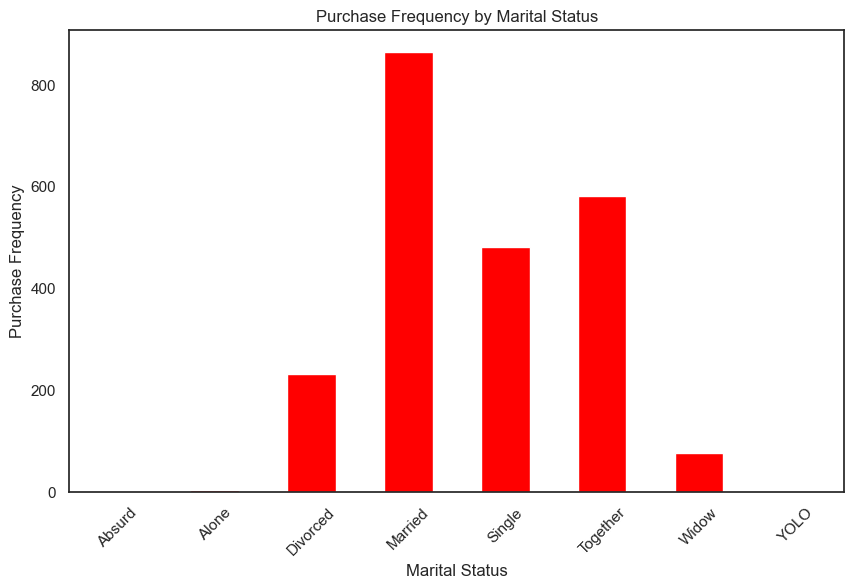

In [103]:
plt.figure(figsize=(10, 6))
purchase_by_marital_status.plot(kind='bar',color="red")
plt.title('Purchase Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

### 7. What characteristics differentiate high-value customers from low-value ones across the features in your dataset?

In [105]:
sf["CV"]

0       6.009848
1       2.899899
2       1.081983
3       0.196429
4       0.611007
          ...   
2235    1.261905
2236    0.077684
2237    0.301738
2238    1.814961
2239    0.991739
Name: CV, Length: 2240, dtype: float64

In [110]:
# Define high-value and low-value customers based on a threshold

def val(col):
    if col["CV"]>= 4.0000:
        return "High Value" 
    else:
        return "Low Value"

In [111]:
sf['Customer Type'] = sf.apply(val,axis=1)

In [112]:
sf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,APF,CV,Day_Week,Day_Week_Name,Month,Year,Dt_Customer_Period,Age,Age_Category,Customer Type
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0.075758,6.009848,0,Monday,6,2014,Weekdays,54,Young Adult,High Value
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0.090452,2.899899,6,Sunday,6,2014,Weekends,63,Elderly,Low Value
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0.047414,1.081983,1,Tuesday,5,2014,Weekdays,66,Elderly,Low Value
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0.071429,0.196429,2,Wednesday,11,2014,Weekdays,57,Young Adult,Low Value
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0.053691,0.611007,0,Monday,8,2014,Weekdays,35,Young Adult,Low Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,0.036630,1.261905,2,Wednesday,7,2013,Weekdays,48,Young Adult,Low Value
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0.007062,0.077684,1,Tuesday,1,2013,Weekdays,47,Young Adult,Low Value
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,0.013672,0.301738,0,Monday,3,2012,Weekdays,48,Young Adult,Low Value
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0.026247,1.814961,3,Thursday,11,2012,Weekdays,46,Young Adult,Low Value


In [113]:
# Define the list of features to compare
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts'] 

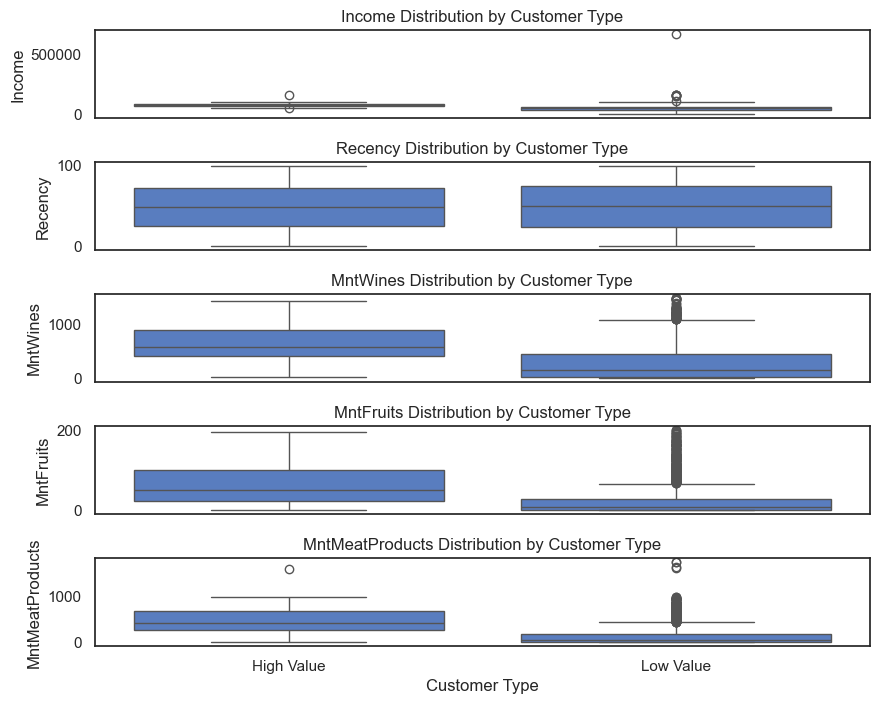

In [114]:
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 8), sharex=True)
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    sns.boxplot(x='Customer Type', y=feature, data=sf, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Customer Type')
    axes[i].set_xlabel('Customer Type')
    axes[i].set_ylabel(feature)

plt.show()